In [42]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///../../data/traffic_counter_1173.sqlite')

df_counters_1173 = []
for year in range(2010, 2016):
    df = pd.read_sql_table(str(year), engine)
    df.name = str(year)
    df_counters_1173.append(df)
    
# df_counters_1173.append(pd.read_sql_table('2010', engine))
# df_counters_1173.append(pd.read_sql_table('2011', engine))
# df_counters_1173.append(pd.read_sql_table('2012', engine))
# df_counters_1173.append(pd.read_sql_table('2013', engine))
# df_counters_1173.append(pd.read_sql_table('2014', engine))
# df_counters_1173.append(pd.read_sql_table('2015', engine))

df_counters_1173[0].head()



,tk_nr,counter_id,federal_state,street,timestamp,weekday,day_type,car_dir1_cnt,car_dir1_validity,bike_dir1_cnt,...,bus_dir1_cnt,bus_dir1_validity,car_dir2_cnt,car_dir2_validity,bike_dir2_cnt,bike_dir2_validity,bus_dir2_cnt,bus_dir2_validity,curations,is_errornous
0,2125,1173,Schleswig-Holstein,A7,2010-01-01 00:00:00,5,s,102,-,0,...,0,-,51,-,0,-,0,-,0,1
1,2125,1173,Schleswig-Holstein,A7,2010-01-01 01:00:00,5,s,312,-,1,...,0,-,183,-,1,-,1,-,0,0
2,2125,1173,Schleswig-Holstein,A7,2010-01-01 02:00:00,5,s,250,-,0,...,0,-,179,-,0,-,0,-,0,0
3,2125,1173,Schleswig-Holstein,A7,2010-01-01 03:00:00,5,s,188,-,2,...,0,-,131,-,0,-,0,-,0,0
4,2125,1173,Schleswig-Holstein,A7,2010-01-01 04:00:00,5,s,119,-,0,...,1,-,79,-,0,-,3,-,0,0


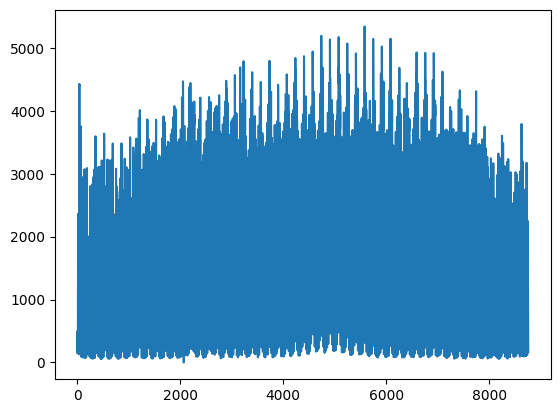

In [43]:
import matplotlib.pyplot as plt
from datetime import date

# Extract hourly car readings for each month
hourly_car_counts_months = [[]] * 12

hour = 0
for i in range(len(df_counters_1173[0])):
    
    p_datetime = df_counters_1173[0].loc[i, 'timestamp']
    p_month = p_datetime.month
    p_hour = p_datetime.hour
    
    p_cars_dir1 = df_counters_1173[0].loc[i, 'car_dir1_cnt']
    p_cars_dir2 = df_counters_1173[0].loc[i, 'car_dir2_cnt']
    
    hourly_car_counts_months[p_month-1].append(p_cars_dir1+p_cars_dir2)        


plt.plot(hourly_car_counts_months[0])

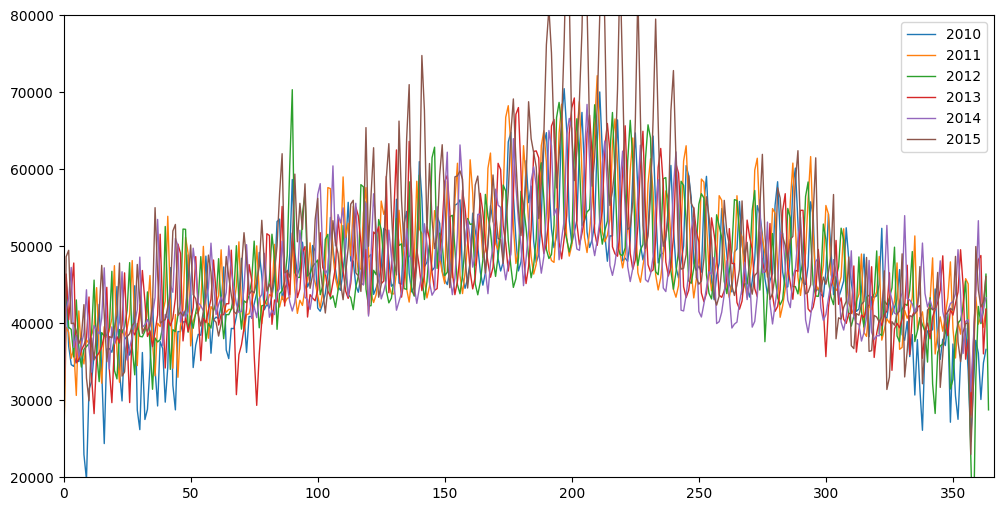

In [54]:
plt.figure(figsize=(12,6))

yearly_traffic_counts = []
for df_counter_1173 in df_counters_1173:
    # Extract daily car readings for each month
    daily_car_counts = []
    is_weekend = []

    day_values = []
    last_p_day = 1
    last_p_daytype = 'w'
    last_p_month = 1
    for i in range(len(df_counter_1173)):
    # for i in range(24*32):
        p_datetime = df_counter_1173.loc[i, 'timestamp']
        # p_month = p_datetime.month
        p_day   = p_datetime.day
        p_daytype = df_counter_1173.loc[i, 'day_type']
        # print(p_datetime)
        
        if p_day != last_p_day:
            daily_sum = sum(day_values)
            # print('len values:', len(day_values), 'values:', day_values, 'sum:', daily_sum)
            # Fix missing values
            missing_values = 24 - len(day_values)
            if missing_values > 0:
                daily_sum += (daily_sum / len(day_values)) *missing_values
                print('Fixed missing daily values for', p_datetime)
            
            daily_car_counts.append(daily_sum)
            # print('Added', daily_sum, 'to month', last_p_month)
            # print(daily_car_counts_months)
            day_values.clear()
            
            if last_p_daytype == 's' or last_p_daytype == 'u':
                is_weekend.append(daily_sum)
                # print('Added work-free at idx', len(is_weekend)-1)
                # print(is_weekend)
            else:
                is_weekend.append(0)
        
        p_traffic_cnt = 0
        p_traffic_cnt += df_counter_1173.loc[i, 'car_dir1_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'car_dir2_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bike_dir1_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bike_dir2_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bus_dir1_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bus_dir2_cnt']
        
        day_values.append(p_traffic_cnt)
        last_p_day = p_day
        last_p_daytype = p_daytype
        # last_p_month = p_month
        
    # print('Printing', len(daily_car_counts_months[0]), 'values')
    # print('Printing', len(daily_car_counts_months[1]), 'values')
    plt.plot(daily_car_counts, linewidth=1.0, label=df_counter_1173.name)
    # plt.plot(is_weekend, 'ro')

plt.axis((0, 366, 20000, 80000))
plt.legend()
        

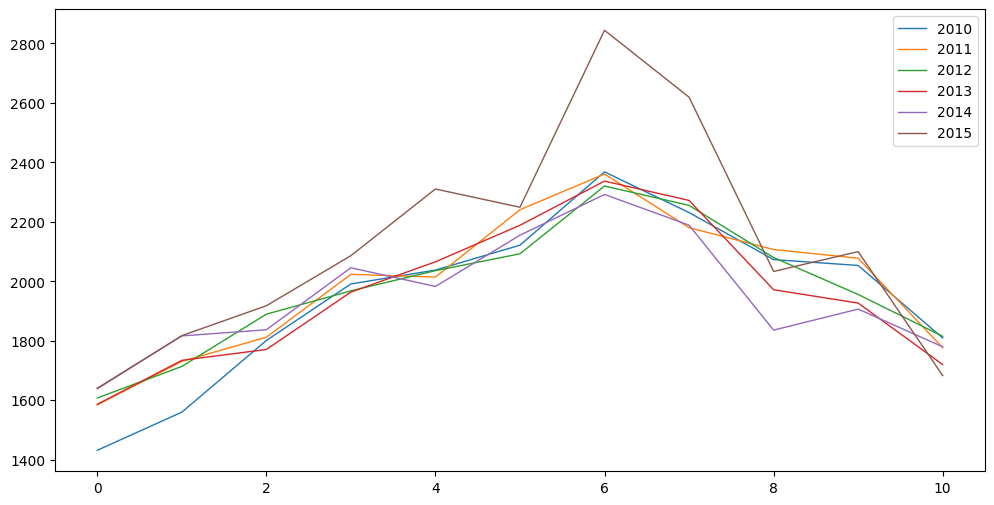

In [59]:
plt.figure(figsize=(12,6))

yearly_traffic_counts = []
for df_counter_1173 in df_counters_1173:
    # Extract daily car readings for each month
    monthly_car_counts = []
    is_weekend = []

    month_values = []
    last_p_day = 1
    last_p_daytype = 'w'
    last_p_month = 1
    for i in range(len(df_counter_1173)):
    # for i in range(24*32):
        p_datetime = df_counter_1173.loc[i, 'timestamp']
        p_month = p_datetime.month
        # p_day   = p_datetime.day
        p_daytype = df_counter_1173.loc[i, 'day_type']
        # print(p_datetime)
        
        if p_month != last_p_month:
            monthly_avg = sum(month_values) / len(month_values)
            # print('len values:', len(day_values), 'values:', day_values, 'sum:', daily_sum)
            # Fix missing values
            # missing_values = 24 - len(day_values)
            # if missing_values > 0:
            #     daily_sum += (daily_sum / len(day_values)) *missing_values
            #     print('Fixed missing daily values for', p_datetime)
            
            monthly_car_counts.append(monthly_avg)
            # print('Added', daily_sum, 'to month', last_p_month)
            # print(daily_car_counts_months)
            month_values.clear()
            
            # if last_p_daytype == 's' or last_p_daytype == 'u':
            #     is_weekend.append(daily_sum)
            #     # print('Added work-free at idx', len(is_weekend)-1)
            #     # print(is_weekend)
            # else:
            #     is_weekend.append(0)
        
        p_traffic_cnt = 0
        p_traffic_cnt += df_counter_1173.loc[i, 'car_dir1_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'car_dir2_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bike_dir1_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bike_dir2_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bus_dir1_cnt']
        p_traffic_cnt += df_counter_1173.loc[i, 'bus_dir2_cnt']
        
        month_values.append(p_traffic_cnt)
        last_p_month = p_month
        # last_p_daytype = p_daytype
        # last_p_month = p_month
        
    # print('Printing', len(daily_car_counts_months[0]), 'values')
    # print('Printing', len(daily_car_counts_months[1]), 'values')
    plt.plot(monthly_car_counts, linewidth=1.0, label=df_counter_1173.name)
    # plt.show()
    # plt.plot(is_weekend, 'ro')

# plt.axis((0, 366, 20000, 80000))
plt.legend()
        